In [1]:
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
np.__version__

'1.13.1'

In [3]:
hello= tf.constant("hello world")

In [4]:
sess = tf.Session()

In [5]:
print(sess.run(hello))

b'hello world'


# operation

In [6]:
class Operation():
    
    def __init__(self,input_nodes = []):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
    
    def compute(self):
        pass

In [7]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var

In [8]:
class multiply(Operation):
    
    def __init__(self,a,b):
        super().__init__([a,b])
        
    def compute(self,a_var,b_var):
        self.inputs = [a_var , b_var]
        return a_var * b_var

In [9]:
class matmul(Operation):
    
    def __init__(self,a,b):
        super().__init__([a,b])
        
    def compute(self,a_var,b_var):
        self.inputs = [a_var,b_var]
        return a_var.dot(b_var)

In [10]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [11]:
class Variable():
    
    def __init__(self,initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [12]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.variables = []
        self.placeholders = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

Z = Ax + b

In [13]:
g = Graph()

In [14]:
g.set_as_default()

In [15]:
A = Variable(10)

In [16]:
b = Variable(1)

In [17]:
x = Placeholder()

In [18]:
y = multiply(A,x)

In [19]:
z = add(y,b)

## Transversing Operation nodes

In [20]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [21]:
class Session():
    
    def run(self,operation,feed_dict= {}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node)== Placeholder:
                
                node.output = feed_dict[node]
            
            elif type(node)== Variable:
                node.output = node.value
                
            else:
                
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output
                

In [22]:
sess = Session()

In [23]:
result =sess.run(operation = z, feed_dict={x:10})

In [24]:
result

101

In [25]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2])

x = Placeholder()

y = matmul(A,x)

z= add(y ,b)

In [26]:
sess = Session()

sess.run(operation=z, feed_dict={x:10})

array([[101, 202],
       [301, 402]])

# Classifiction Problem

## Activation Function

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [29]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

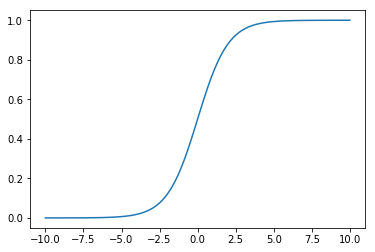

In [30]:
plt.plot(sample_z,sample_a)

In [31]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super.__init__([z])
    
    def compute(self,z_val):
        return 1/(1 + np.exp(-z_val))

# tensorflow Basics

In [32]:
import tensorflow as tf

In [33]:
print(tf.__version__)

1.3.0


In [34]:
hello = tf.constant("hello")

In [35]:
world = tf.constant(" world")

In [36]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [37]:
print(hello)

Tensor("Const_1:0", shape=(), dtype=string)


In [38]:
with tf.Session() as sess:
    result = sess.run(hello + world)

In [39]:
print(result)

b'hello world'


In [40]:
a = tf.constant(10)

In [41]:
b = tf.constant(20)

In [42]:
with tf.Session() as sess:
    result =sess.run(a + b)

In [43]:
print(result)

30


In [44]:
fill_mat = tf.fill((3,3),4)

In [45]:
myzeroes = tf.zeros((3,3))

In [46]:
myones = tf.ones((4,4))

In [47]:
myrandn = tf.random_normal((3,3),mean=0, stddev=1.0)

In [48]:
myrandu = tf.random_uniform((3,3),minval=0, maxval=1)

In [49]:
my_ops = [fill_mat,myzeroes,myones,myrandn,myrandu]

In [50]:
sess = tf.InteractiveSession()

In [51]:
for op in my_ops:
    print(sess.run(op))
    print("\n")

[[4 4 4]
 [4 4 4]
 [4 4 4]]


[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


[[ 0.43107837  0.07497181  1.69085932]
 [ 2.02032661 -0.13682735 -0.35420829]
 [ 0.29083535  0.93454432 -0.46456739]]


[[ 0.38718426  0.55112338  0.66378629]
 [ 0.50916016  0.98543859  0.01778316]
 [ 0.70730066  0.27141261  0.08221591]]




In [52]:
a = tf.constant([[1,2],[3,4]])

In [53]:
b = tf.constant([[100],[200]])

In [54]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [55]:
result = tf.matmul(a,b)

In [56]:
sess.run(result)

array([[ 500],
       [1100]])

In [57]:
result.eval()

array([[ 500],
       [1100]])

# TF Graphs

In [58]:
n1 = tf.constant(1)

In [59]:
n2 = tf.constant(2)

In [60]:
n3 = n1 + n2

In [61]:
with tf.Session() as sess:
    result = sess.run(n3)

In [62]:
result

3

In [63]:
print(tf.get_default_graph())

In [64]:
g = tf.Graph()

In [65]:
print(g)

In [66]:
graph_one = tf.get_default_graph()

In [67]:
print(graph_one)

In [68]:
graph_two = tf.Graph()

In [69]:
graph_two

In [70]:
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


# Variables and Placeholders

In [71]:
sess = tf.InteractiveSession()

In [72]:
my_tensor = tf.random_uniform((4,4),minval=0,maxval=1)

In [73]:
my_var = tf.Variable(initial_value=my_tensor)

In [74]:
init = tf.global_variables_initializer()

In [75]:
sess.run(init)

In [76]:
sess.run(my_var)

array([[ 0.09088647,  0.24788272,  0.33239925,  0.39428926],
       [ 0.34194362,  0.57034075,  0.37767863,  0.68235612],
       [ 0.22947443,  0.26868331,  0.92933142,  0.80861056],
       [ 0.00995338,  0.73779035,  0.35876632,  0.90889287]], dtype=float32)

In [77]:
ph = tf.placeholder(tf.float32,shape=(None,5))

In [78]:
np.random.seed(101)
tf.set_random_seed(101)

In [79]:
rand_a = np.random.uniform(0,100,(5,5))

In [80]:
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [81]:
rand_b = np.random.uniform(0,100,(5,1))

In [82]:
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [83]:
a = tf.placeholder(tf.float32)

In [84]:
b = tf.placeholder(tf.float32)

In [85]:
add_op = a + b

In [86]:
mul_op = a * b

In [87]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mul_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


# Example Neural Network

In [88]:
n_features = 10
n_dense_neurons = 3

In [89]:
x = tf.placeholder(tf.float32,(None,n_features))

In [90]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [91]:
xW = tf.matmul(x,W)

In [92]:
z = tf.add(xW,b)

In [93]:
init = tf.global_variables_initializer()

In [94]:
with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={a:np.random.random([1,n_features])})

In [95]:
print(layer_out)

[[ 0.91315353  0.80792016  0.40299782  0.35722435  0.95287669  0.34363157
   0.86509979  0.83027774  0.53816146  0.92246938]]


## Simple Regression Example

In [96]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [97]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

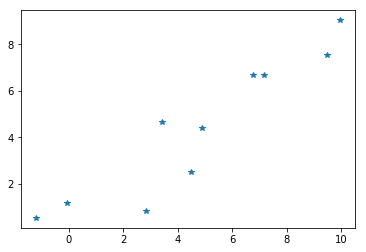

In [98]:
plt.plot(x_data,y_label,'*')

y = mx + b

In [99]:
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [100]:
m = tf.Variable(0.81)
b = tf.Variable(0.67)

In [101]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b
    
    error += (y - y_hat) **2
        

In [102]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [103]:
init = tf.global_variables_initializer()

In [104]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

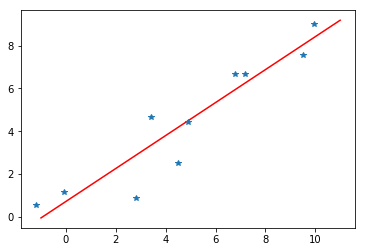

In [105]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope * x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

In [106]:
import pandas as pd

In [107]:
 x_data = np.linspace(0.0,10.0,100000)

In [108]:
noise = np.random.randn(len(x_data))

y = mx + b

b = 5

In [109]:
y_true = 0.5 * x_data + 5 + noise

In [110]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [111]:
y_df = pd.DataFrame(data= y_true, columns=['Y'])

In [112]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [113]:
my_data.head()

,X Data,Y
0,0.0000,4.968421
1,0.0001,5.649876
2,0.0002,7.154946
3,0.0003,4.389891
4,0.0004,4.244875


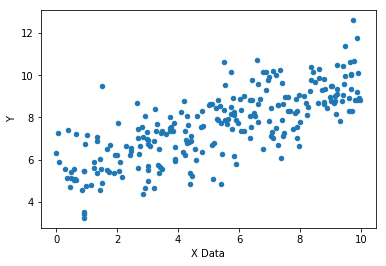

In [114]:
my_data.sample(n=250).plot(kind = 'scatter', x= 'X Data',y = 'Y')

In [115]:
batch_size = 8

In [116]:
np.random.randn(2)

array([-0.18348481, -0.86551277])

In [117]:
m = tf.Variable(1.09)
b = tf.Variable(0.39)

In [118]:
xph = tf.placeholder(tf.float32,[batch_size])

In [119]:
yph = tf.placeholder(tf.float32,[batch_size])

In [120]:
y_model = m* xph + b 

In [121]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [122]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [123]:
init = tf.global_variables_initializer()

In [124]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict= feed)
        
    model_m , model_b = sess.run([m,b])

In [125]:
model_m

0.53169894

In [126]:
model_b

5.0064635

In [127]:
y_hat = x_data * model_m + model_b

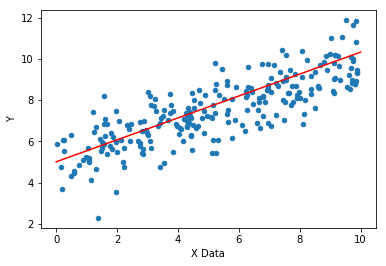

In [128]:
my_data.sample(n=250).plot(kind = 'scatter', x= 'X Data',y= 'Y')
plt.plot(x_data,y_hat,'r')

## TF Estimator

In [129]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [130]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmpoaaft2sn', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1}


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [133]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,
                                                num_epochs=None,shuffle=True)

In [134]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,
                                                      num_epochs=1000,shuffle=False)

In [135]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_eval},y_eval,batch_size=8,
                                                      num_epochs=1000,shuffle=False)

In [136]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Lenovo\AppData\Local\Temp\tmpoaaft2sn\model.ckpt.
INFO:tensorflow:step = 1, loss = 618.041
INFO:tensorflow:global_step/sec: 1960.3
INFO:tensorflow:step = 101, loss = 23.2144 (0.053 sec)
INFO:tensorflow:global_step/sec: 1785.27
INFO:tensorflow:step = 201, loss = 25.8219 (0.056 sec)
INFO:tensorflow:global_step/sec: 1666.34
INFO:tensorflow:step = 301, loss = 39.5989 (0.059 sec)
INFO:tensorflow:global_step/sec: 1470.18
INFO:tensorflow:step = 401, loss = 11.0213 (0.069 sec)
INFO:tensorflow:global_step/sec: 1612.62
INFO:tensorflow:step = 501, loss = 10.1013 (0.061 sec)
INFO:tensorflow:global_step/sec: 1753.99
INFO:tensorflow:step = 601, loss = 12.2958 (0.057 sec)
INFO:tensorflow:global_step/sec: 1538.11
INFO:tensorflow:step = 701, loss = 10.6275 (0.065 sec)
INFO:tensorflow:global_step/sec: 1785.3
INFO:tensorflow:step = 801, loss = 7.18661 (0.057 sec)
INFO:tensorflow:global_step/sec: 1514.8
INFO

In [137]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2022-08-01-06:56:42
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpoaaft2sn\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [138]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2022-08-01-06:56:45
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpoaaft2sn\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [139]:
print("training data metrics")
print(train_metrics)

training data metrics
{'global_step': 1000, 'average_loss': 1.1028442, 'loss': 8.8227539}


In [140]:
print("eval data metrics ")
print(eval_metrics)

eval data metrics 
{'global_step': 1000, 'average_loss': 1.0973197, 'loss': 8.7785578}


In [141]:
brand_new_data = np.linspace(0,10,10)

In [142]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},
                                                     shuffle = False)

In [143]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpoaaft2sn\model.ckpt-1000


[{'predictions': array([ 4.3791337], dtype=float32)},
 {'predictions': array([ 5.03358507], dtype=float32)},
 {'predictions': array([ 5.68803644], dtype=float32)},
 {'predictions': array([ 6.34248734], dtype=float32)},
 {'predictions': array([ 6.99693871], dtype=float32)},
 {'predictions': array([ 7.65139008], dtype=float32)},
 {'predictions': array([ 8.30584145], dtype=float32)},
 {'predictions': array([ 8.96029282], dtype=float32)},
 {'predictions': array([ 9.61474419], dtype=float32)},
 {'predictions': array([ 10.26919556], dtype=float32)}]

In [144]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpoaaft2sn\model.ckpt-1000


In [145]:
predictions

[array([ 4.3791337], dtype=float32),
 array([ 5.03358507], dtype=float32),
 array([ 5.68803644], dtype=float32),
 array([ 6.34248734], dtype=float32),
 array([ 6.99693871], dtype=float32),
 array([ 7.65139008], dtype=float32),
 array([ 8.30584145], dtype=float32),
 array([ 8.96029282], dtype=float32),
 array([ 9.61474419], dtype=float32),
 array([ 10.26919556], dtype=float32)]

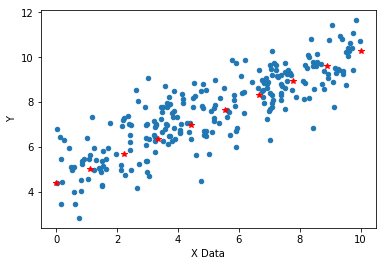

In [146]:
my_data.sample(n=250).plot(kind= 'scatter',x = 'X Data', y = 'Y')
plt.plot(brand_new_data,predictions,'r*')

In [147]:
import pandas as pd

In [148]:
pd.__version__

'0.20.3'

In [149]:
diabetes = pd.read_csv('C://Users//Lenovo//Desktop//FULL_TENSORFLOW_NOTES__AND_DATA//Tensorflow-Bootcamp-master//02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [150]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [151]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [152]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', ]

In [153]:
diabetes[cols_to_norm]= diabetes[cols_to_norm].apply(lambda x : (x - x.min())/(x.max()- x.min()))

In [154]:
diabetes[cols_to_norm].head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


In [155]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [156]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [157]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

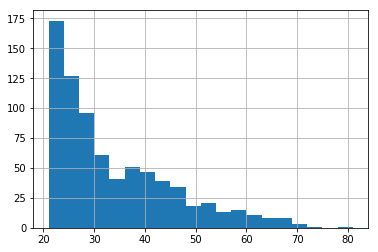

In [158]:
diabetes['Age'].hist(bins = 20)

In [159]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [160]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

In [161]:
x_data = diabetes.drop('Class', axis = 1)

In [162]:
label = diabetes['Class']

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
 X_train, X_test, y_train, y_test = train_test_split(x_data,label, test_size=0.3, random_state=101)

In [165]:
input_func = tf.estimator.inputs.pandas_input_fn(x= X_train,y= y_train,batch_size=10,
                                                num_epochs = 1000,shuffle = True)

In [166]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmpzrnwip36', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1}


In [167]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Lenovo\AppData\Local\Temp\tmpzrnwip36\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 547.173
INFO:tensorflow:step = 101, loss = 5.7012 (0.185 sec)
INFO:tensorflow:global_step/sec: 675.268
INFO:tensorflow:step = 201, loss = 5.43966 (0.147 sec)
INFO:tensorflow:global_step/sec: 602.763
INFO:tensorflow:step = 301, loss = 3.68667 (0.166 sec)
INFO:tensorflow:global_step/sec: 625.221
INFO:tensorflow:step = 401, loss = 3.90987 (0.160 sec)
INFO:tensorflow:global_step/sec: 665.533
INFO:tensorflow:step = 501, loss = 6.80321 (0.152 sec)
INFO:tensorflow:global_step/sec: 645.707
INFO:tensorflow:step = 601, loss = 5.44594 (0.155 sec)
INFO:tensorflow:global_step/sec: 662.225
INFO:tensorflow:step = 701, loss = 5.12468 (0.151 sec)
INFO:tensorflow:global_step/sec: 671.366
INFO:tensorflow:step = 801, loss = 4.2414 (0.149 sec)
INFO:tensorflow:global_step/sec: 605.69
INFO

In [168]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,y = y_test,num_epochs=1,
                                                     batch_size=10,shuffle = False)

In [169]:
result = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2022-08-01-06:56:56
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpzrnwip36\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2022-08-01-06:56:56
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.803004, auc_precision_recall = 0.650946, average_loss = 0.526241, global_step = 1000, label/mean = 0.350649, loss = 5.06507, prediction/mean = 0.361793


In [170]:
result

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80300415,
 'auc_precision_recall': 0.65094632,
 'average_loss': 0.52624065,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0650659,
 'prediction/mean': 0.36179328}

## predictions

In [171]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,batch_size=10,
                                                     num_epochs =1,shuffle = False)

In [189]:
predictions = model.predict(pred_input_func)

In [190]:
my_preds =list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpzrnwip36\model.ckpt-1000


In [ ]:
my_preds

## DNN Classifier

In [193]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmp5wcpn85f', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1}


In [194]:
# UH OH! AN ERROR. Check out the video to see why and how to fix.
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/feature_column/feature_column.py
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Lenovo\AppData\Local\Temp\tmp5wcpn85f\model.ckpt.
INFO:tensorflow:step = 1, loss = 10.6587
INFO:tensorflow:global_step/sec: 549.35
INFO:tensorflow:step = 101, loss = 6.04104 (0.184 sec)
INFO:tensorflow:global_step/sec: 709.054
INFO:tensorflow:step = 201, loss = 6.41407 (0.142 sec)
INFO:tensorflow:global_step/sec: 684.779
INFO:tensorflow:step = 301, loss = 4.70415 (0.145 sec)
INFO:tensorflow:global_step/sec: 657.746
INFO:tensorflow:step = 401, loss = 6.28015 (0.152 sec)
INFO:tensorflow:global_step/sec: 699.145
INFO:tensorflow:step = 501, loss = 4.49635 (0.144 sec)
INFO:tensorflow:global_step/sec: 612.073
INFO:tensorflow:step = 601, loss = 3.75418 (0.161 sec)
INFO:tensorflow:global_step/sec: 657.746
INFO:tensorflow:step = 701, loss = 4.52239 (0.152 sec)
INFO:tensorflow:global_step/sec: 613.357
INFO:tensorflow:step = 801, loss = 6.60303 (0.164 sec)
INFO:tensorflow:global_step/sec: 636.798
IN

In [195]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [197]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_bucket]

In [198]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [199]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmpkbem32zh', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1}


In [200]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Lenovo\AppData\Local\Temp\tmpkbem32zh\model.ckpt.
INFO:tensorflow:step = 1, loss = 8.25906
INFO:tensorflow:global_step/sec: 534.634
INFO:tensorflow:step = 101, loss = 7.71562 (0.187 sec)
INFO:tensorflow:global_step/sec: 613.359
INFO:tensorflow:step = 201, loss = 3.80374 (0.164 sec)
INFO:tensorflow:global_step/sec: 694.284
INFO:tensorflow:step = 301, loss = 5.35129 (0.144 sec)
INFO:tensorflow:global_step/sec: 704.072
INFO:tensorflow:step = 401, loss = 3.9095 (0.142 sec)
INFO:tensorflow:global_step/sec: 704.051
INFO:tensorflow:step = 501, loss = 4.80949 (0.142 sec)
INFO:tensorflow:global_step/sec: 588.107
INFO:tensorflow:step = 601, loss = 2.80393 (0.169 sec)
INFO:tensorflow:global_step/sec: 609.618
INFO:tensorflow:step = 701, loss = 1.28317 (0.164 sec)
INFO:tensorflow:global_step/sec: 645.221
INFO:tensorflow:step = 801, loss = 3.92569 (0.157 sec)
INFO:tensorflow:global_step/sec: 645.023
IN

In [201]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [202]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2022-08-01-07:05:19
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpkbem32zh\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2022-08-01-07:05:19
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.753247, accuracy_baseline = 0.649351, auc = 0.822222, auc_precision_recall = 0.660651, average_loss = 0.499042, global_step = 1000, label/mean = 0.350649, loss = 4.80328, prediction/mean = 0.335482


{'accuracy': 0.75324672,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82222223,
 'auc_precision_recall': 0.66065115,
 'average_loss': 0.499042,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.8032794,
 'prediction/mean': 0.33548152}